In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path='C:/Users/FT-LT74/Desktop/notes/github/time-series-forecasting-store-sales/data/interim/'

In [3]:
df=pd.read_csv(path+'merged_df.csv')
df

C:\Users\FT-LT74\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008775 entries, 0 to 3008774
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   store_type    object        
 9   cluster       int64         
 10  transactions  float64       
 11  dcoilwtico    float64       
 12  holiday_type  object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 390.2+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

## EDA plots

#### Sales performance

In [6]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [11]:
temp = df.groupby(by=['date','store_nbr'])['sales'].sum().to_frame().reset_index()
temp = pd.pivot(temp, index='date', columns='store_nbr', values='sales').reset_index().rename_axis(None, axis=1)
temp.set_index(['date'],inplace=True)
temp

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000
2013-01-02,7417.148000,10266.718981,24060.348000,10200.083980,10598.61902,13520.485002,11997.502000,14659.32800,15867.484000,5430.08800,...,27612.050950,27149.92000,27263.111010,19700.000000,16281.845000,16576.132000,15134.490990,0.000,0.00000,4973.285000
2013-01-03,5873.244001,7612.540000,18570.745025,7400.245000,7770.96800,9929.393000,9277.958000,10781.24300,10431.719000,4549.52998,...,17377.980970,15751.35500,18340.205000,14350.784030,9909.082000,11066.465040,11170.057015,0.000,0.00000,3901.570000
2013-01-04,5919.879001,7526.377000,17392.097995,6902.050001,7347.64199,8869.211980,8096.573018,11124.65100,8085.159000,3381.01600,...,19936.195040,17073.06408,18982.008970,15276.803001,10284.566000,12147.440000,12452.326000,0.000,0.00000,3266.966000
2013-01-05,6318.785010,9539.566000,22700.872005,9948.383000,8192.59800,12431.689040,8610.605999,14277.69902,13057.110000,5409.78501,...,27104.223034,27231.19803,26996.263995,22876.474000,13506.025000,17930.364000,15046.247000,0.000,0.00000,4394.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742021,13081.771001,32885.759996,10819.543000,9510.87100,15775.922000,15090.052970,18440.07100,15569.746000,5932.17900,...,42991.258000,32020.67400,38072.657020,26365.391000,32977.570000,21339.243004,26070.018000,30742.706,12033.40700,8513.834000
2017-08-12,7543.623000,12382.416000,31903.476000,10622.300000,8157.07000,14502.508000,14668.772022,19548.54801,16901.506991,6322.80800,...,38285.203104,28639.05300,34385.410000,24749.852000,30722.046040,19413.958001,19532.964000,22525.366,12316.15790,9139.678002
2017-08-13,3902.782000,13766.822095,34845.119300,13065.903000,10044.82100,19261.918980,14871.927000,21646.66000,18128.805000,6773.54200,...,46029.399000,32935.39800,38953.744000,29164.995000,32984.485000,21221.233000,25713.284030,24232.105,12750.17602,14246.827996


<AxesSubplot:title={'center':'Sales acoss date by Store'}, xlabel='date'>

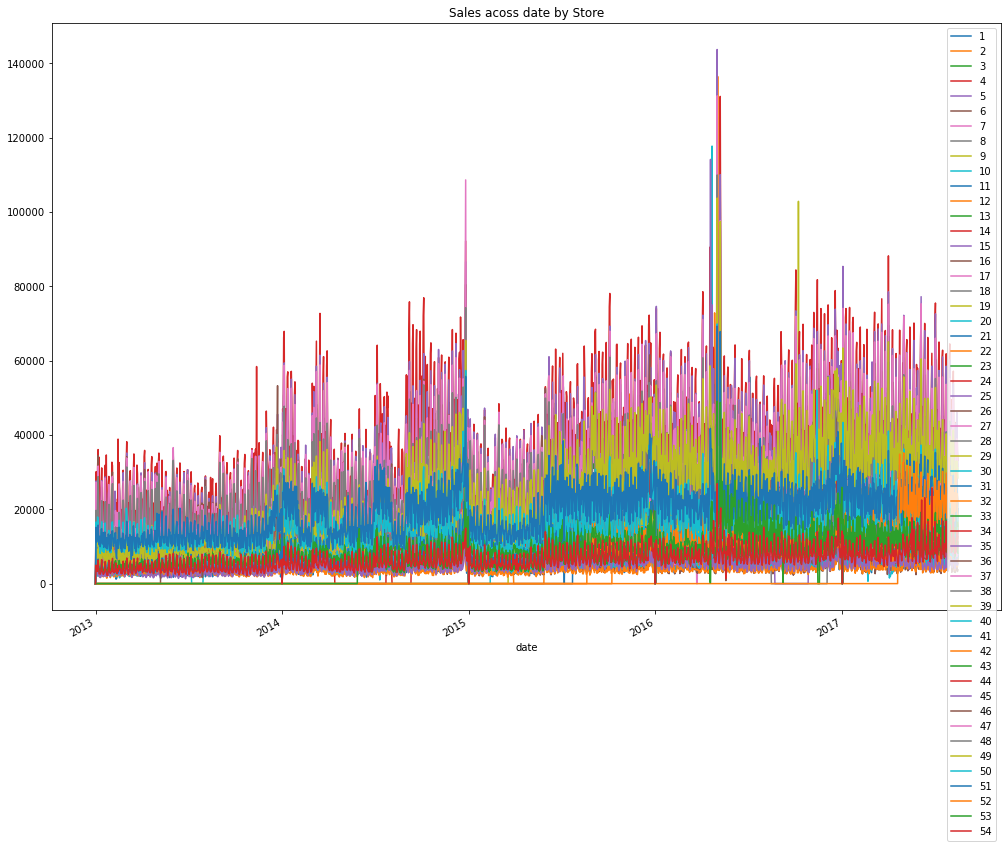

In [13]:
temp.plot(figsize=(17, 12), title='Sales acoss date by Store')

<AxesSubplot:xlabel='store_nbr'>

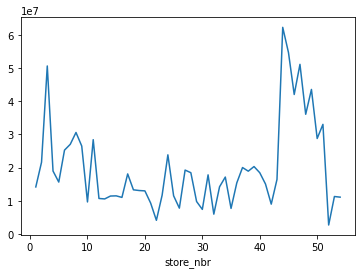

In [13]:
df.groupby(by=['store_nbr'])['sales'].sum().plot(kind='line', x='store_nbr', y='sales')

<AxesSubplot:title={'center':'Total Sales in Ecuador over Time'}, xlabel='date'>

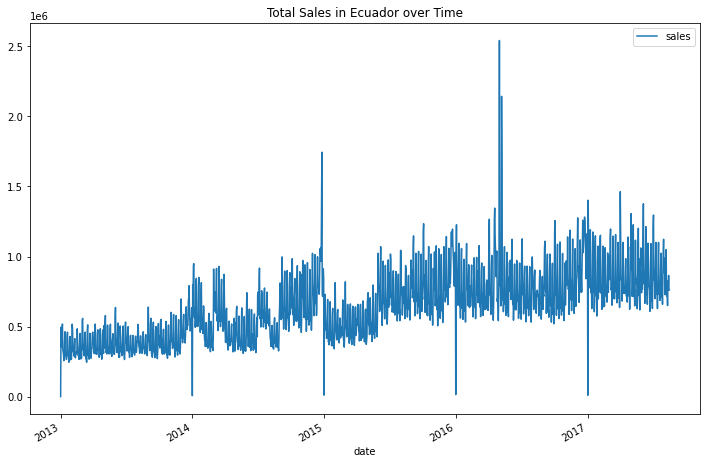

In [14]:
df.groupby(by=['date'])['sales'].sum().plot(kind='line', x='date', y='sales', 
                                            legend=True, figsize=(12,8), title='Total Sales in Ecuador over Time')

In [53]:
# using matplotlib
totalsales_over_time = df.groupby(by=['date'])['sales'].sum().to_frame().reset_index()
totalsales_over_time

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1679,2017-08-11,826373.722022
1680,2017-08-12,792630.535079
1681,2017-08-13,865639.677471
1682,2017-08-14,760922.406081


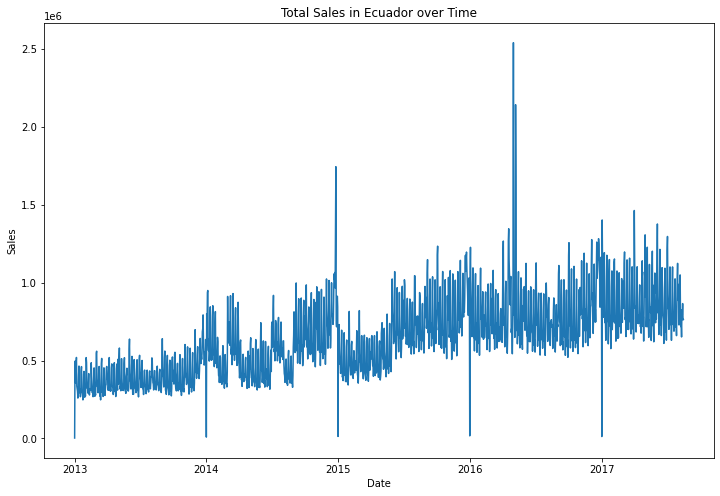

In [66]:
plt.figure(figsize=(12,8))
plt.plot(totalsales_over_time['date'], totalsales_over_time['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Total Sales in Ecuador over Time')
plt.show()
plt.close()

In [68]:
totalsales_by_store= df.groupby(by=['store_nbr'])['sales'].sum().to_frame().reset_index()
totalsales_by_store.head()

,store_nbr,sales
0,1,1.417755e+07
1,2,2.162876e+07
2,3,5.065960e+07
3,4,1.897815e+07
4,5,1.564707e+07


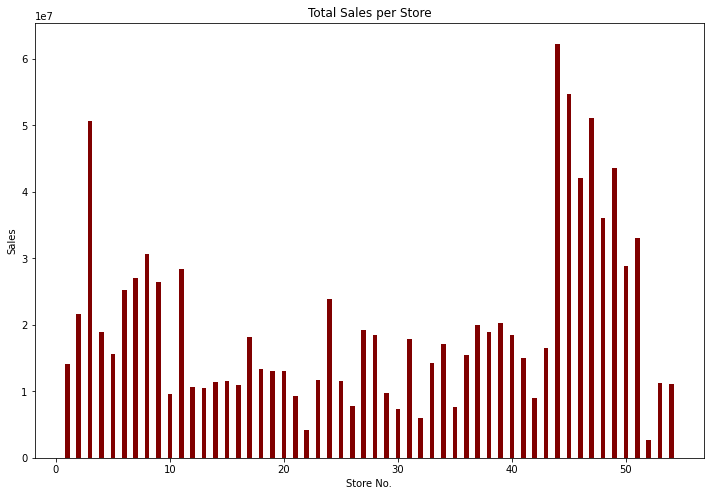

In [69]:
plt.figure(figsize=(12,8))
plt.bar(totalsales_by_store['store_nbr'], totalsales_by_store['sales'], color ='maroon', width = 0.4)
plt.xlabel("Store No.")
plt.ylabel("Sales")
plt.title("Total Sales per Store")
plt.show()
plt.close()

## Data Cleaning: check for NAs

In [ ]:
df.isna().any()

## check is holiday is celebrated where the store is located

matching by:
* locale='Local', store's city
* locale='Regional', store's state

In [ ]:
df['city'].unique()

In [ ]:
df['state'].unique()

In [ ]:
df['locale_name'].unique()

In [ ]:
df['locale'].unique()

In [ ]:
df[(df['state']==df['locale_name']) & (df['locale']=='Regional')]

In [ ]:
df[(df['city']==df['locale_name'])  & (df['locale']=='Local')]

In [ ]:
df[(df['state']==df['locale_name']) & (df['locale']=='Local')]  ## city and state name are the same